# ND025 - PROJECT 1 - AIRBNB
#### by Huynh Nhut NGUYEN

## Introduction

In this project, I use the Airbnb data which comes from [www.kaggle.com](https://www.kaggle.com/datasets/airbnb/boston) for my analysis.
The steps are as following:
1. Studying the business
2. Wrangling the Airbnb data
3. Analyzing exploratory the data
4. Make conclusions

## 1. Studying the business

Millions of people use Airbnb today, a community-based online housing marketplace, to buy and rent out local properties. Despite not really owning any rooms, it links hosts and guests and streamlines the rental process. The primary source of income for Airbnb is the commission levied on each reservation. Finding ways to boost transaction volume and client retention is crucial for Airbnb.

By examining a dataset that contains listings, a calendar, and reviews, the goal of this project is to gather insightful information and anticipate the booking cost for a new property given a date and other characteristics. To identify the issues, it is necessary to look at the following questions:

1. Let's imagine that a group of vacationers travels to Jamaica Plain, Massachusetts, on June 8, 2017, and wishes to remain there. What space is now accessible to them?
2. How much does it cost to move between streets in Jamaica Plain?
3. Supposedly, the facilities and lodging design may have an impact on pricing discrepancies. (room type, facilities)

## 2. Wrangling the Airbnb data

### 2.1 Download the data

Download data from here: https://www.kaggle.com/datasets/airbnb/boston

Then extract the .zip file to "data" folder in the same place of our jupyter notebook file. I mean that the **\*.ipynb** file.

### 2.2 Take a look at the data for a overview

In [1]:
"""
Import needed libraries
"""

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
"""
To store csv file paths to variable for further use
"""

calendar_path = "./data/calendar.csv"
listings_path = "./data/listings.csv"
reviews_path  = "./data/reviews.csv"

#### 2.2.1 THE CALENDAR DATA

In [3]:
"""
To read data from csv file
"""

calendar_df = pd.read_csv(calendar_path)

In [4]:
calendar_df.head(10)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
5,12147973,2017-08-31,f,NaN
6,12147973,2017-08-30,f,NaN
7,12147973,2017-08-29,f,NaN
8,12147973,2017-08-28,f,NaN
9,12147973,2017-08-27,f,NaN


In [5]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [6]:
calendar_df.shape

(1308890, 4)

In [7]:
calendar_df.isnull().sum()

listing_id         0
date               0
available          0
price         665853
dtype: int64

#### 2.2.2 THE LISTINGS DATA

In [8]:
listings_df = pd.read_csv(listings_path)

In [9]:
listings_df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [10]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [11]:
listings_df.shape

(3585, 95)

In [12]:
listings_df.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   756
Length: 95, dtype: int64

#### 2.2.3 THE REVIEWS DATA

In [13]:
reviews_df = pd.read_csv(reviews_path)

In [14]:
reviews_df.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
5,1178162,5198929,2013-06-17,6663826,Arndt,A truely exeptional place to stay. The hosts a...
6,1178162,6702817,2013-08-21,8099222,Maurice,It was a really nice time in Boston - best pla...
7,1178162,6873023,2013-08-28,7671888,Elodie,"Islam is a very nice guy ! Attentive, funny, h..."
8,1178162,7646702,2013-09-28,8197342,Arkadiusz,"The place is really well furnished, pleasant a..."
9,1178162,8094418,2013-10-15,9040491,Matthew,Our stay at Islam's place was fantastic. We co...


In [15]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [16]:
reviews_df.shape

(68275, 6)

In [17]:
reviews_df.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         53
dtype: int64

### 2.3 CLEAN THE DATA

#### 2.3.1 THE CALENDAR DATA

In [18]:
"""
To drop null values
"""

calendar_df = calendar_df.dropna()
calendar_df.shape

(643037, 4)

In [19]:
"""
Only need rows which have "available" is "t", because those rows have the "price" value
"""
calendar_df = calendar_df.where(calendar_df["available"] != "f")
calendar_df.shape
calendar_df.head()

,listing_id,date,available,price
365,3075044,2017-08-22,t,$65.00
366,3075044,2017-08-21,t,$65.00
367,3075044,2017-08-20,t,$65.00
368,3075044,2017-08-19,t,$75.00
369,3075044,2017-08-18,t,$75.00


#### 2.3.2 THE LISTINGS DATA

In [20]:
"""
We do not focus on this data, so no need to dropna this data
"""

# listings_df = listings_df.dropna()
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


#### 2.3.3 THE REVIEWS DATA

In [21]:
"""
We do not focus on this data, so no need to dropna this data
"""

# reviews_df = reviews_df.dropna()
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


### 2.4 TRANSFORM THE DATA

In [22]:
"""
Select needed columns of calendar data
"""

calendar_needed_cols = [
    "listing_id",
    "date",
    "price"
]

calendar_df = calendar_df[calendar_needed_cols]
calendar_df = calendar_df.drop_duplicates()
calendar_df.head()

,listing_id,date,price
365,3075044,2017-08-22,$65.00
366,3075044,2017-08-21,$65.00
367,3075044,2017-08-20,$65.00
368,3075044,2017-08-19,$75.00
369,3075044,2017-08-18,$75.00


In [23]:
"""
Select needed columns of listings data
"""

listings_needed_cols = [
    "id",
    "country_code",
    "state",
    "city",
    "street",
    "longitude",
    "latitude",
    "property_type",
    "room_type",
    "bed_type",
    "bedrooms",
    "beds",
    "minimum_nights",
    "number_of_reviews",
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value"
]

listings_df = listings_df[listings_needed_cols]
listings_df = listings_df.rename(columns={"id": "listing_id"})

listings_df.head()

,listing_id,country_code,state,city,street,longitude,latitude,property_type,room_type,bed_type,...,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,12147973,US,MA,Boston,"Birch Street, Boston, MA 02131, United States",-71.133068,42.282619,House,Entire home/apt,Real Bed,...,3.0,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3075044,US,MA,Boston,"Pinehurst Street, Boston, MA 02131, United States",-71.134374,42.286241,Apartment,Private room,Real Bed,...,1.0,2,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0
2,6976,US,MA,Boston,"Ardale St., Boston, MA 02131, United States",-71.135765,42.292438,Apartment,Private room,Real Bed,...,1.0,3,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0
3,1436513,US,MA,Boston,"Boston, MA, United States",-71.121021,42.281106,House,Private room,Real Bed,...,2.0,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0
4,7651065,US,MA,Boston,"Durnell Avenue, Boston, MA 02131, United States",-71.136258,42.284512,House,Private room,Real Bed,...,2.0,2,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0


In [24]:
"""
To join calendar to listings for getting some needed data
"""

cleaned_df = pd.merge(calendar_df, listings_df, on="listing_id", how="inner")
cleaned_df.head()

,listing_id,date,price,country_code,state,city,street,longitude,latitude,property_type,...,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,3075044,2017-08-22,$65.00,US,MA,Boston,"Pinehurst Street, Boston, MA 02131, United States",-71.134374,42.286241,Apartment,...,1.0,2,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0
1,3075044,2017-08-21,$65.00,US,MA,Boston,"Pinehurst Street, Boston, MA 02131, United States",-71.134374,42.286241,Apartment,...,1.0,2,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0
2,3075044,2017-08-20,$65.00,US,MA,Boston,"Pinehurst Street, Boston, MA 02131, United States",-71.134374,42.286241,Apartment,...,1.0,2,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0
3,3075044,2017-08-19,$75.00,US,MA,Boston,"Pinehurst Street, Boston, MA 02131, United States",-71.134374,42.286241,Apartment,...,1.0,2,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0
4,3075044,2017-08-18,$75.00,US,MA,Boston,"Pinehurst Street, Boston, MA 02131, United States",-71.134374,42.286241,Apartment,...,1.0,2,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0


In [25]:
"""
Convert object column to datetime
"""

cleaned_df.date = pd.to_datetime(cleaned_df.date)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642957 entries, 0 to 642956
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   642957 non-null  int64         
 1   date                         642957 non-null  datetime64[ns]
 2   price                        642957 non-null  object        
 3   country_code                 642957 non-null  object        
 4   state                        642957 non-null  object        
 5   city                         642230 non-null  object        
 6   street                       642957 non-null  object        
 7   longitude                    642957 non-null  float64       
 8   latitude                     642957 non-null  float64       
 9   property_type                642809 non-null  object        
 10  room_type                    642957 non-null  object        
 11  bed_type                  

In [26]:
"""
The street column contains existed information from other column, so we only need street name
"""

cleaned_df.street = [element.split(",")[0] for element in cleaned_df.street]
cleaned_df.head()

,listing_id,date,price,country_code,state,city,street,longitude,latitude,property_type,...,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,3075044,2017-08-22,$65.00,US,MA,Boston,Pinehurst Street,-71.134374,42.286241,Apartment,...,1.0,2,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0
1,3075044,2017-08-21,$65.00,US,MA,Boston,Pinehurst Street,-71.134374,42.286241,Apartment,...,1.0,2,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0
2,3075044,2017-08-20,$65.00,US,MA,Boston,Pinehurst Street,-71.134374,42.286241,Apartment,...,1.0,2,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0
3,3075044,2017-08-19,$75.00,US,MA,Boston,Pinehurst Street,-71.134374,42.286241,Apartment,...,1.0,2,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0
4,3075044,2017-08-18,$75.00,US,MA,Boston,Pinehurst Street,-71.134374,42.286241,Apartment,...,1.0,2,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0


In [27]:
"""
Currently, the price is in string value with specical character "$" and break number with ","
So we need remove "$" and "," then convert it to number
"""

cleaned_df.price = cleaned_df.price.str.replace("$", "").str.replace(",", "").astype(float)
cleaned_df.head()

,listing_id,date,price,country_code,state,city,street,longitude,latitude,property_type,...,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,3075044,2017-08-22,65.0,US,MA,Boston,Pinehurst Street,-71.134374,42.286241,Apartment,...,1.0,2,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0
1,3075044,2017-08-21,65.0,US,MA,Boston,Pinehurst Street,-71.134374,42.286241,Apartment,...,1.0,2,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0
2,3075044,2017-08-20,65.0,US,MA,Boston,Pinehurst Street,-71.134374,42.286241,Apartment,...,1.0,2,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0
3,3075044,2017-08-19,75.0,US,MA,Boston,Pinehurst Street,-71.134374,42.286241,Apartment,...,1.0,2,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0
4,3075044,2017-08-18,75.0,US,MA,Boston,Pinehurst Street,-71.134374,42.286241,Apartment,...,1.0,2,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0


In [28]:
"""
To save our dataframe to a csv file for further use
"""

cleaned_df.to_csv("./data/cleaned_airbnb_data.csv", index=False)

## 3. Analyzing exploratory the data

### 3.1 What are livable hotels in Jamaica Plain at the time tourists come?

An example that tourists will come to the Jamaica Plain on 8-June-2017 for summer vacation. What are livable hotels for them?

In [29]:
"""
To load cleaned data from csv file
"""

airbnb_df = pd.read_csv("./data/cleaned_airbnb_data.csv")

In [30]:
airbnb_df.head()

,listing_id,date,price,country_code,state,city,street,longitude,latitude,property_type,...,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,3075044,2017-08-22,65.0,US,MA,Boston,Pinehurst Street,-71.134374,42.286241,Apartment,...,1.0,2,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0
1,3075044,2017-08-21,65.0,US,MA,Boston,Pinehurst Street,-71.134374,42.286241,Apartment,...,1.0,2,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0
2,3075044,2017-08-20,65.0,US,MA,Boston,Pinehurst Street,-71.134374,42.286241,Apartment,...,1.0,2,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0
3,3075044,2017-08-19,75.0,US,MA,Boston,Pinehurst Street,-71.134374,42.286241,Apartment,...,1.0,2,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0
4,3075044,2017-08-18,75.0,US,MA,Boston,Pinehurst Street,-71.134374,42.286241,Apartment,...,1.0,2,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0


In [31]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642957 entries, 0 to 642956
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   642957 non-null  int64  
 1   date                         642957 non-null  object 
 2   price                        642957 non-null  float64
 3   country_code                 642957 non-null  object 
 4   state                        642957 non-null  object 
 5   city                         642230 non-null  object 
 6   street                       642230 non-null  object 
 7   longitude                    642957 non-null  float64
 8   latitude                     642957 non-null  float64
 9   property_type                642809 non-null  object 
 10  room_type                    642957 non-null  object 
 11  bed_type                     642957 non-null  object 
 12  bedrooms                     639689 non-null  float64
 13 

In [32]:
airbnb_df.shape

(642957, 23)

In [33]:
"""
To filter data of Jamica Plain
"""

airbnb_df = airbnb_df[airbnb_df["city"]=='Jamaica Plain']

In [34]:
"""
To convert the date column to datetime data type for filtering
"""

airbnb_df.date = pd.to_datetime(airbnb_df.date)

In [35]:
"""
An example that tourists will come to the Jamaica Plain on 8-Jun-2017 for a summer vacation.
Get three days data for airbnb, before and after one day the arrival date.
"""

airbnb_df = airbnb_df[
    (airbnb_df.date >= datetime.datetime(2017, 6, 6)) &
    (airbnb_df.date <= datetime.datetime(2017, 6, 9))
]

airbnb_df

,listing_id,date,price,country_code,state,city,street,longitude,latitude,property_type,...,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
16321,932853,2017-06-09,135.0,US,MA,Jamaica Plain,Chestnut Avenue,-71.109407,42.314215,Apartment,...,1.0,1,17,96.0,9.0,10.0,10.0,10.0,10.0,9.0
16322,932853,2017-06-08,135.0,US,MA,Jamaica Plain,Chestnut Avenue,-71.109407,42.314215,Apartment,...,1.0,1,17,96.0,9.0,10.0,10.0,10.0,10.0,9.0
16323,932853,2017-06-07,135.0,US,MA,Jamaica Plain,Chestnut Avenue,-71.109407,42.314215,Apartment,...,1.0,1,17,96.0,9.0,10.0,10.0,10.0,10.0,9.0
16324,932853,2017-06-06,135.0,US,MA,Jamaica Plain,Chestnut Avenue,-71.109407,42.314215,Apartment,...,1.0,1,17,96.0,9.0,10.0,10.0,10.0,10.0,9.0
18164,1030500,2017-06-09,100.0,US,MA,Jamaica Plain,Northbourne Road,-71.115936,42.291061,Apartment,...,1.0,1,14,88.0,9.0,9.0,10.0,10.0,8.0,9.0
18165,1030500,2017-06-08,100.0,US,MA,Jamaica Plain,Northbourne Road,-71.115936,42.291061,Apartment,...,1.0,1,14,88.0,9.0,9.0,10.0,10.0,8.0,9.0
18166,1030500,2017-06-07,100.0,US,MA,Jamaica Plain,Northbourne Road,-71.115936,42.291061,Apartment,...,1.0,1,14,88.0,9.0,9.0,10.0,10.0,8.0,9.0
18167,1030500,2017-06-06,100.0,US,MA,Jamaica Plain,Northbourne Road,-71.115936,42.291061,Apartment,...,1.0,1,14,88.0,9.0,9.0,10.0,10.0,8.0,9.0
23478,950046,2017-06-09,250.0,US,MA,Jamaica Plain,Gordon Street,-71.109263,42.311853,Apartment,...,3.0,4,6,90.0,9.0,10.0,9.0,10.0,10.0,10.0
23479,950046,2017-06-08,250.0,US,MA,Jamaica Plain,Gordon Street,-71.109263,42.311853,Apartment,...,3.0,4,6,90.0,9.0,10.0,9.0,10.0,10.0,10.0


In [36]:
"""
To get available hotels
"""

livable_hotel_df = airbnb_df[airbnb_df["date"] == datetime.datetime(2017, 6, 8)].reset_index()

In [38]:
import folium

worldMap = folium.Map()
map = folium.Map()


"""
To plot livable hotel into the world map
"""

for index, row in livable_hotel_df.iterrows():
    point = folium.map.FeatureGroup().add_child(
        folium.CircleMarker(
            (
                row["latitude"],
                row["longitude"]
            ),
            radius=5,
            color="Green",
            fill_color="Green")
    )
    worldMap.add_child(point)

In [39]:
"""
To view the result in world map
"""

worldMap

### 3.2 What is the price difference among streets in the Jamaica Plain?

In [40]:
"""
To review the data again
"""

livable_hotel_df.head()

,index,listing_id,date,price,country_code,state,city,street,longitude,latitude,...,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,16322,932853,2017-06-08,135.0,US,MA,Jamaica Plain,Chestnut Avenue,-71.109407,42.314215,...,1.0,1,17,96.0,9.0,10.0,10.0,10.0,10.0,9.0
1,18165,1030500,2017-06-08,100.0,US,MA,Jamaica Plain,Northbourne Road,-71.115936,42.291061,...,1.0,1,14,88.0,9.0,9.0,10.0,10.0,8.0,9.0
2,23479,950046,2017-06-08,250.0,US,MA,Jamaica Plain,Gordon Street,-71.109263,42.311853,...,3.0,4,6,90.0,9.0,10.0,9.0,10.0,10.0,10.0
3,27388,6053700,2017-06-08,450.0,US,MA,Jamaica Plain,Eliot Street,-71.114579,42.309835,...,6.0,1,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0
4,29359,4765070,2017-06-08,90.0,US,MA,Jamaica Plain,Creighton St,-71.107230,42.325089,...,1.0,2,139,93.0,9.0,10.0,10.0,10.0,9.0,9.0


In [41]:
"""
To check null value
"""

livable_hotel_df.isnull().sum()

index                          0
listing_id                     0
date                           0
price                          0
country_code                   0
state                          0
city                           0
street                         0
longitude                      0
latitude                       0
property_type                  0
room_type                      0
bed_type                       0
bedrooms                       0
beds                           0
minimum_nights                 0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64

In [42]:
"""
To select needed columns for my purpose
"""

prices_df = livable_hotel_df[["street", "price"]]

In [43]:
"""
To group by street and get the mean value of prices
"""

prices_df = prices_df.groupby("street").mean().sort_values("price").reset_index()

In [44]:
"""
To take a look at the output result
"""

prices_df

,street,price
0,South St,61.0
1,Sunnyside Street,75.0
2,Creighton St,90.0
3,Northbourne Road,100.0
4,Lamartine Street,119.0
5,Chestnut Avenue,135.0
6,Spring Park Avenue,148.0
7,Creighton Street,178.0
8,Chestnut Ave,250.0
9,Gordon Street,250.0


In [45]:
"""
To select needed columns for my purpose
"""

number_of_livable_hotels_df = livable_hotel_df[["street", "price"]]

In [46]:
"""
To group by street and then count how many livable hotels for tourist on each street
After that, sort our result by the price
"""

number_of_livable_hotels_df = number_of_livable_hotels_df.groupby("street").count().sort_values("price")

In [47]:
"""
To rename the aggregate column for more clearly meaning
"""

number_of_livable_hotels_df = number_of_livable_hotels_df.rename(columns={"price": "number_of_livable_hotels"})

In [48]:
"""
To review the our output result
"""

number_of_livable_hotels_df

,number_of_livable_hotels
street,
Chestnut Ave,1
Chestnut Avenue,1
Creighton St,1
Creighton Street,1
Eliot Street,1
Glenvale Terrace,1
Gordon Street,1
Lamartine Street,1
Moraine St,1


In [49]:
"""
To join our two results to know how many livable hotels on a street and the mean price of each street
"""

street_group_df = pd.merge(prices_df, number_of_livable_hotels_df, on="street")

In [50]:
"""
To review our output result
"""

street_group_df

,street,price,number_of_livable_hotels
0,South St,61.0,1
1,Sunnyside Street,75.0,1
2,Creighton St,90.0,1
3,Northbourne Road,100.0,1
4,Lamartine Street,119.0,1
5,Chestnut Avenue,135.0,1
6,Spring Park Avenue,148.0,1
7,Creighton Street,178.0,1
8,Chestnut Ave,250.0,1
9,Gordon Street,250.0,1


In [51]:
"""
To get streets which have a lot of livable hotels, but our data have 1 hotel for each street so I will get all the street
"""

package_sidewalk_df = street_group_df[street_group_df["number_of_livable_hotels"] > 0].street.values

In [52]:
"""
To review our output result
"""

package_sidewalk_df

array(['South St', 'Sunnyside Street', 'Creighton St', 'Northbourne Road',
       'Lamartine Street', 'Chestnut Avenue', 'Spring Park Avenue',
       'Creighton Street', 'Chestnut Ave', 'Gordon Street',
       'Moraine Street', 'Seaverns Ave', 'Glenvale Terrace', 'Moraine St',
       'Eliot Street'], dtype=object)

In [53]:
"""
To review data again, but we have 15 streets and 1 hotel for each
"""

street_group_df["number_of_livable_hotels"].value_counts()

1    15
Name: number_of_livable_hotels, dtype: int64

In [54]:
"""
To have a quick look at the data for the visualization
"""

street_group_df.sort_values("number_of_livable_hotels").tail()

,street,price,number_of_livable_hotels
10,Moraine Street,275.0,1
11,Seaverns Ave,275.0,1
12,Glenvale Terrace,300.0,1
13,Moraine St,300.0,1
14,Eliot Street,450.0,1


Text(0.5, 1.0, 'Streets of hotels, ranked by price')

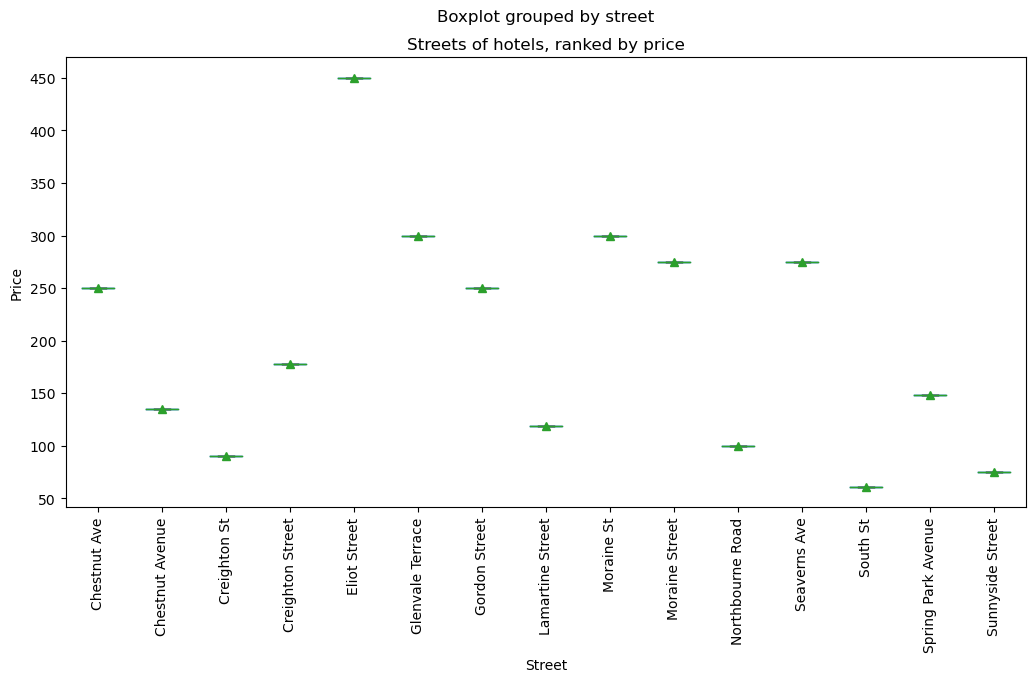

In [55]:
"""
Import matplotlib library for plot data to
"""

import matplotlib.pyplot as plt

livable_hotel_df.set_index("street").loc[package_sidewalk_df,:].reset_index().boxplot(
    "price",
    "street",
    grid=False,
    rot=90,
    figsize=(12, 6),
    showmeans=True
)
plt.ylabel("Price")
plt.xlabel("Street")
plt.title("Streets of hotels, ranked by price")


The range of typical prices is between 100 and 300. Extreme prices, however, might sometimes have an effect on pricing that is more common. One is more than $450. As a result, prices fluctuate not just from street to street but even from block to block. Obviously, the type of accommodation and other facilities might vary. Let's investigate whether the supposition is true or false.

#### Bed Types

In [56]:
livable_hotel_df.columns

Index(['index', 'listing_id', 'date', 'price', 'country_code', 'state', 'city',
       'street', 'longitude', 'latitude', 'property_type', 'room_type',
       'bed_type', 'bedrooms', 'beds', 'minimum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

Text(0.5, 1.0, 'Beds Ranked By Prices')

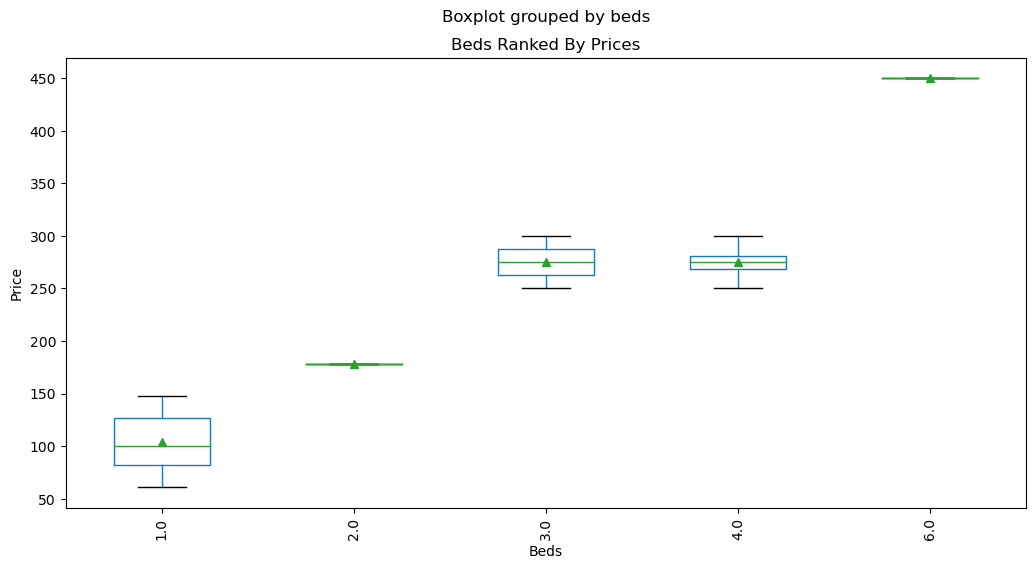

In [57]:
livable_hotel_df.boxplot(
    "price",
    "beds",
    grid=False,
    rot=90,
    figsize=(12, 6),
    showmeans=True
)
plt.ylabel("Price")
plt.xlabel("Beds")
plt.title("Beds Ranked By Prices")

Text(0.5, 1.0, 'Property Type Ranked By Prices')

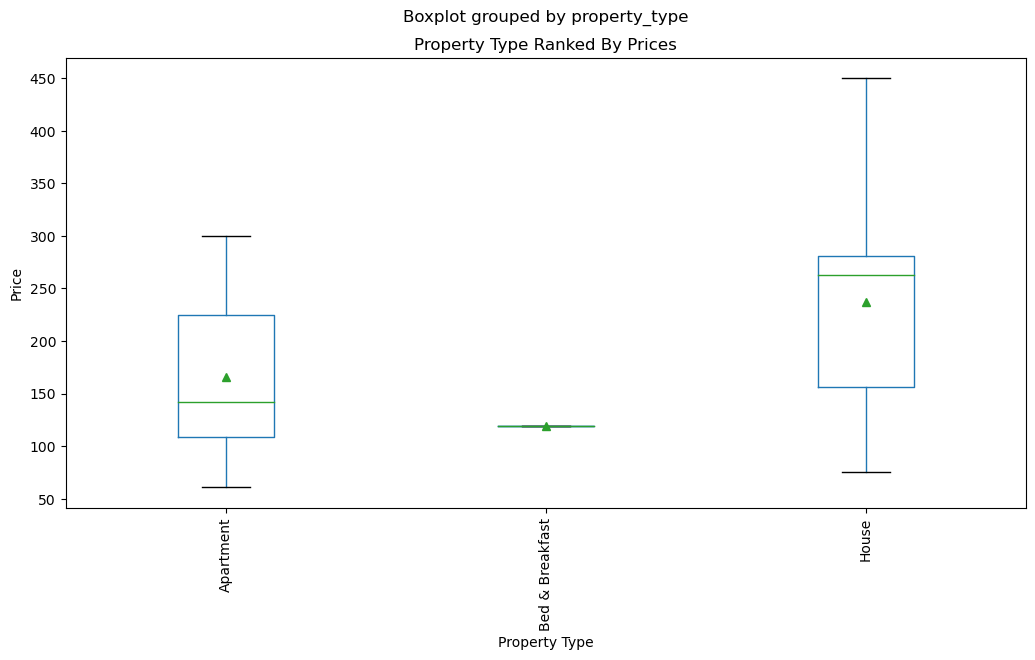

In [58]:
livable_hotel_df.boxplot(
    "price",
    "property_type",
    grid=False,
    rot=90,
    figsize=(12, 6),
    showmeans=True
)
plt.ylabel("Price")
plt.xlabel("Property Type")
plt.title("Property Type Ranked By Prices")

Text(0.5, 1.0, 'Bed Type Ranked By Prices')

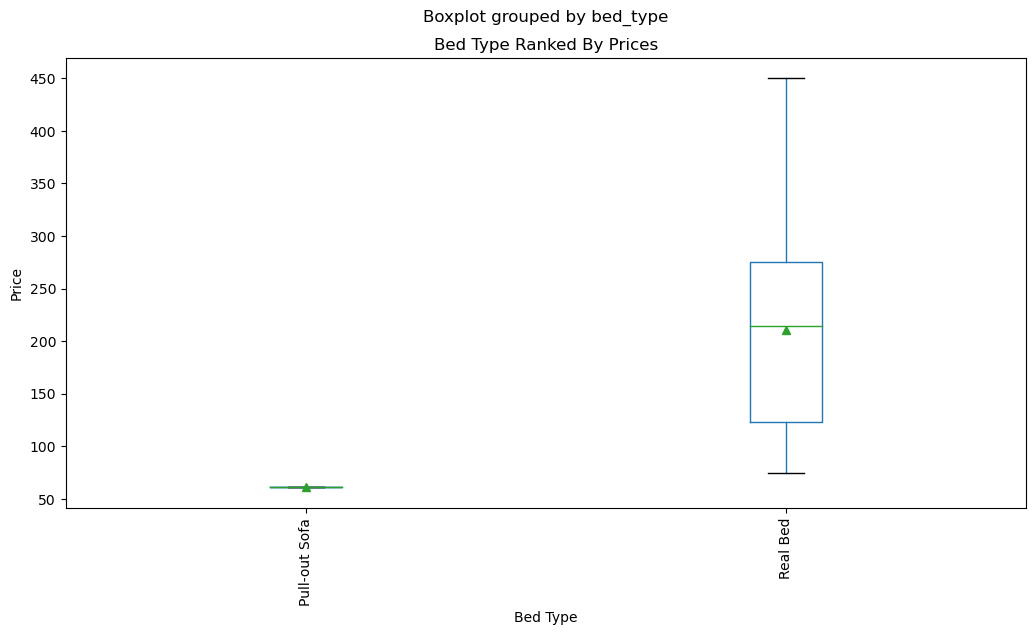

In [59]:
livable_hotel_df.boxplot(
    "price",
    "bed_type",
    grid=False,
    rot=90,
    figsize=(12, 6),
    showmeans=True
)
plt.ylabel("Price")
plt.xlabel("Bed Type")
plt.title("Bed Type Ranked By Prices")

Text(0.5, 1.0, 'Room Type Ranked By Prices')

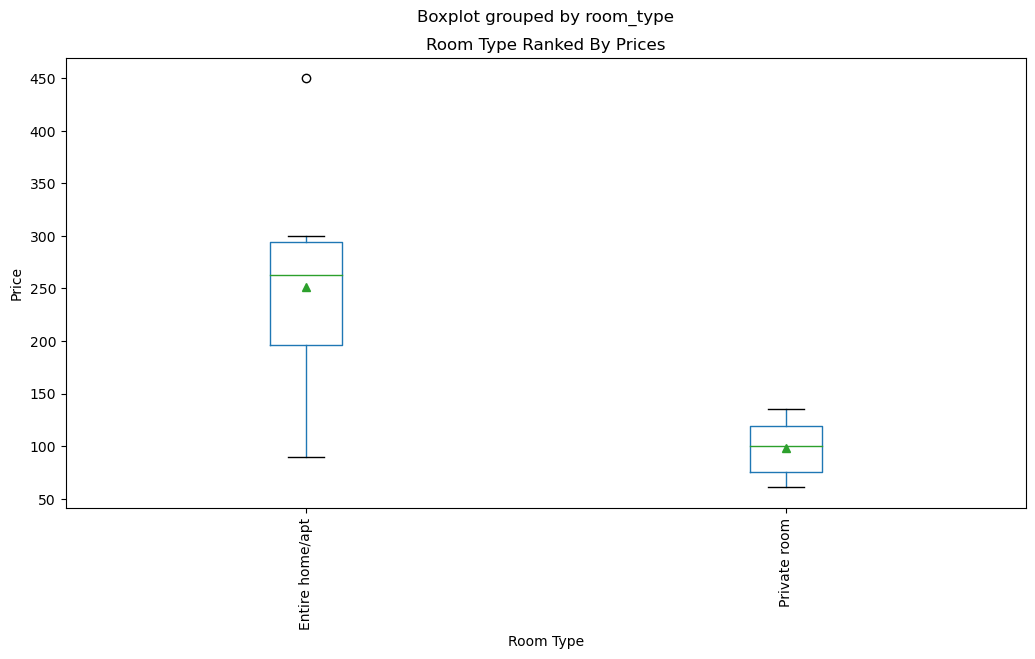

In [60]:
livable_hotel_df.boxplot(
    "price",
    "room_type",
    grid=False,
    rot=90,
    figsize=(12, 6),
    showmeans=True
)
plt.ylabel("Price")
plt.xlabel("Room Type")
plt.title("Room Type Ranked By Prices")

### Apartment, House and Bed & Breakfast

Text(0.5, 1.0, 'Apartment Ranked By Beds And Prices')

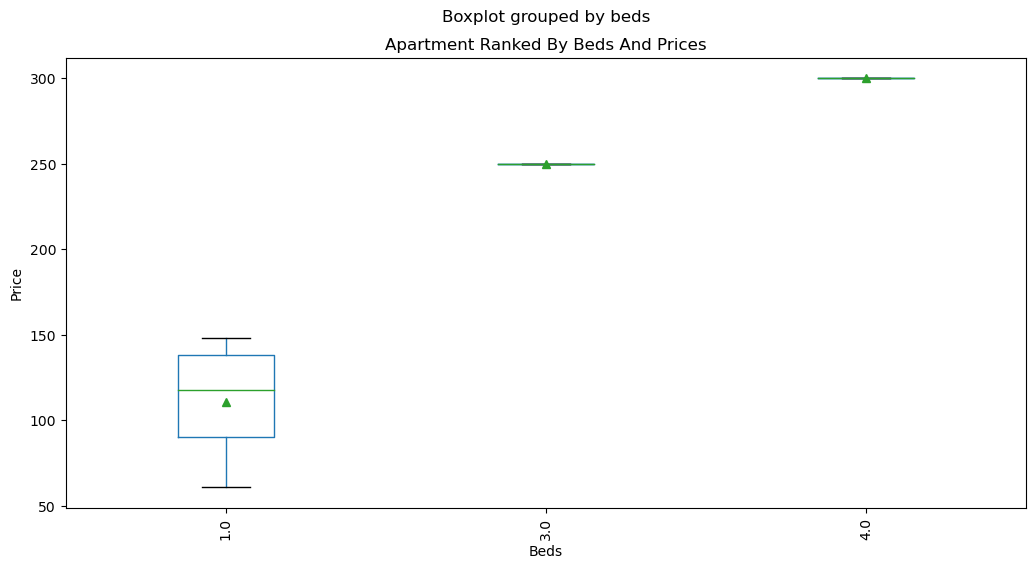

In [61]:
livable_hotel_df[
    livable_hotel_df["property_type"] == "Apartment"
].boxplot(
    "price",
    "beds",
    grid=False,
    rot=90,
    figsize=(12, 6),
    showmeans=True
)
plt.ylabel("Price")
plt.xlabel("Beds")
plt.title("Apartment Ranked By Beds And Prices")

Text(0.5, 1.0, 'House Ranked By Beds And Prices')

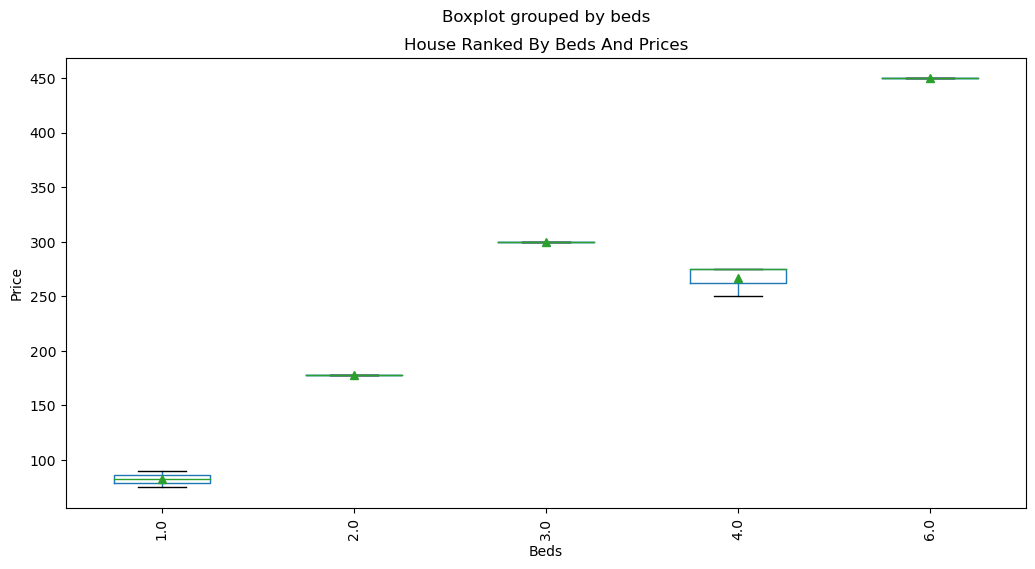

In [62]:
livable_hotel_df[
    livable_hotel_df["property_type"] == "House"
].boxplot(
    "price",
    "beds",
    grid=False,
    rot=90,
    figsize=(12, 6),
    showmeans=True
)
plt.ylabel("Price")
plt.xlabel("Beds")
plt.title("House Ranked By Beds And Prices")

Text(0.5, 1.0, 'Bed & Breakfast Ranked By Beds And Prices')

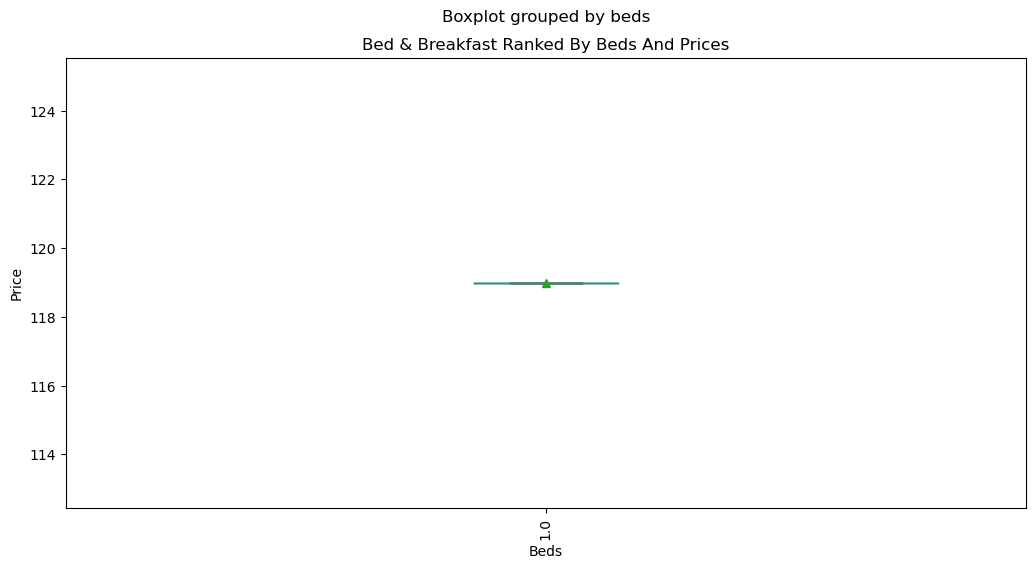

In [63]:
livable_hotel_df[
    livable_hotel_df["property_type"] == "Bed & Breakfast"
].boxplot(
    "price",
    "beds",
    grid=False,
    rot=90,
    figsize=(12, 6),
    showmeans=True
)
plt.ylabel("Price")
plt.xlabel("Beds")
plt.title("Bed & Breakfast Ranked By Beds And Prices")

### Packed Streets

Text(0.5, 1.0, 'Chestnut Ave: Beds Ranked By Prices')

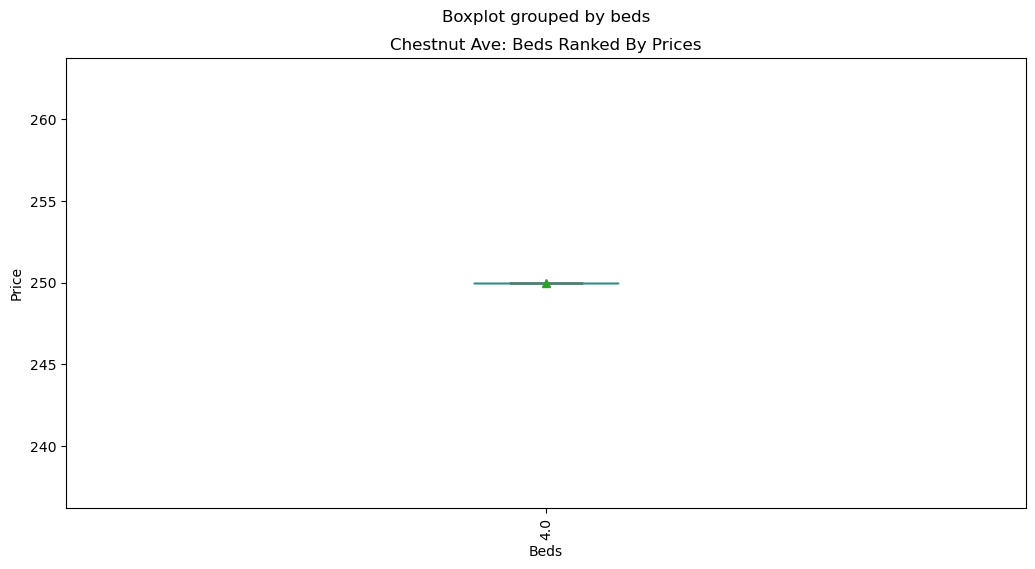

In [64]:
livable_hotel_df[
    livable_hotel_df["street"] == "Chestnut Ave"
].boxplot(
    "price",
    "beds",
    grid=False,
    rot=90,
    figsize=(12, 6),
    showmeans=True
)
plt.ylabel("Price")
plt.xlabel("Beds")
plt.title("Chestnut Ave: Beds Ranked By Prices")

Text(0.5, 1.0, 'Glenvale Terrace: Beds Ranked By Prices')

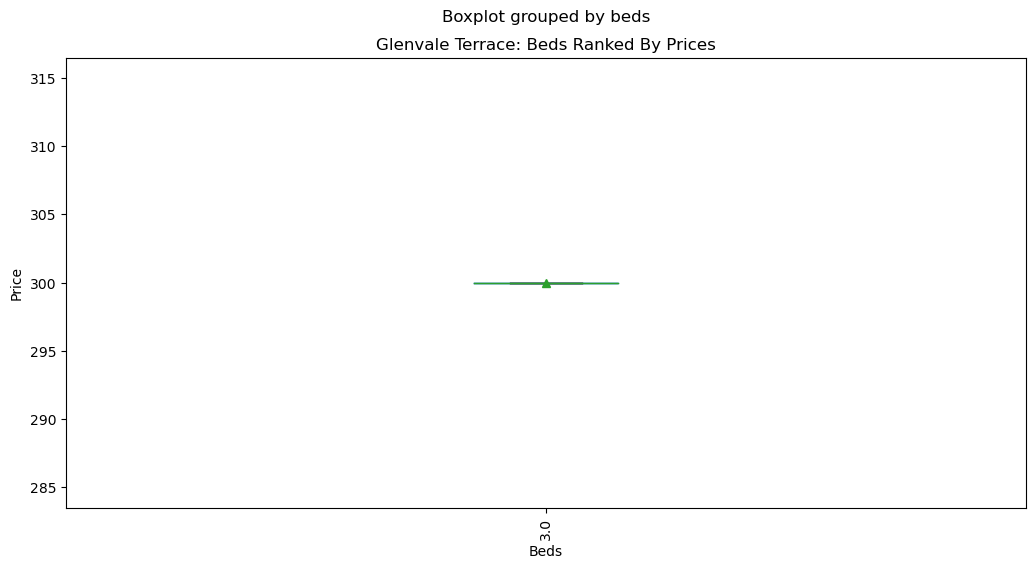

In [65]:
livable_hotel_df[
    livable_hotel_df["street"] == "Glenvale Terrace"
].boxplot(
    "price",
    "beds",
    grid=False,
    rot=90,
    figsize=(12, 6),
    showmeans=True
)
plt.ylabel("Price")
plt.xlabel("Beds")
plt.title("Glenvale Terrace: Beds Ranked By Prices")

## 4. Conclusions

In general, prices for different lodging options on a specific day (2017, June 8) depend both on the street (some busy streets have extremely high charges) and the facilities provided. such as the number of beds, the style of lodging, such as an apartment or home, and other amenities displayed in the boxplots above.

Data used in a recommendation system for tourists can be filtered with the aid of the findings of both the analysis and the first-hand observation. To enhance the quality of our deep dive analysis, we can include some mocked_user-requirements.